In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import requests
import shutil
import gzip
import os

# Task 1

This will download the file and extract its content.

In [2]:
def download_extract(url):
    response = requests.get(url)

    path = os.path.basename(url)

    if response.ok:
        with open(path, 'wb') as f:
            f.write(response.content)

        with gzip.open(path, 'rb') as cont:
            with open(path.split('.')[0] + '.txt', 'wb') as f_out:
                shutil.copyfileobj(cont, f_out)
    print(f'Downloaded {path}')

download_extract('https://snap.stanford.edu/data/facebook_combined.txt.gz')


Downloaded facebook_combined.txt.gz


This will import the data to networkx.

In [3]:
g = nx.read_edgelist('facebook_combined.txt')

# Task 2

This will print the graph info.

In [4]:
print(nx.info((g)))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


This will display a visualization of the graph.

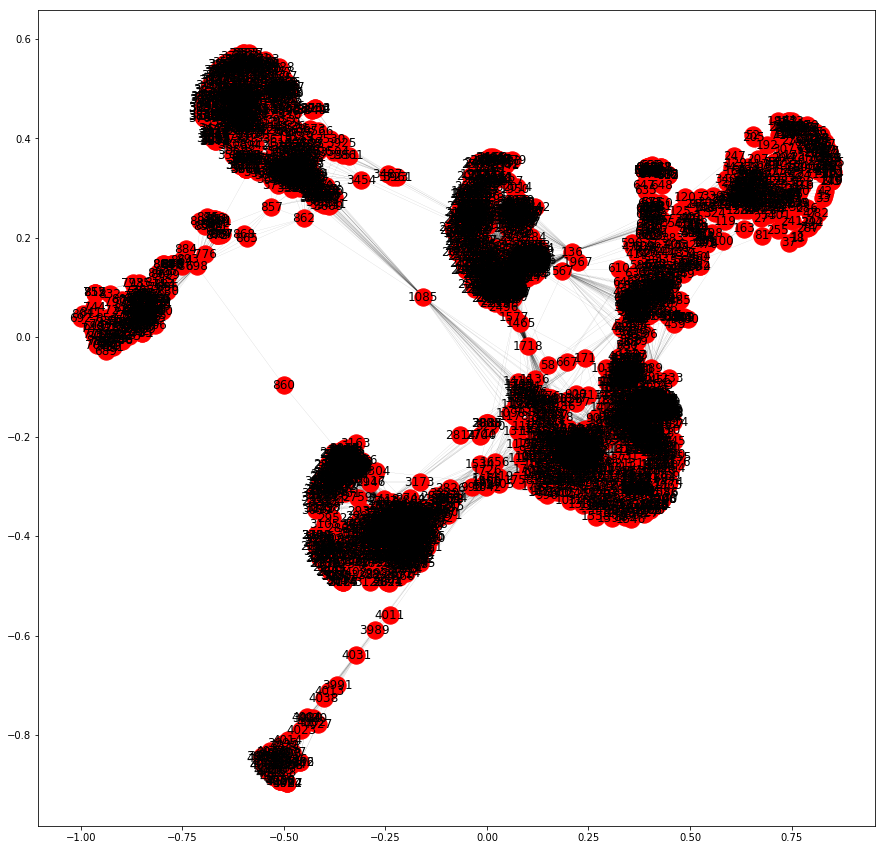

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(15,15));
nx.draw_networkx(g, pos=nx.spring_layout(g), width=.05, ax=ax)

# Task 3

This will report the top 10 most connected people.

In [6]:
top_ten = sorted(g.degree, key=lambda x: x[1], reverse=True)

top_ten[:10]

[('107', 1045),
 ('1684', 792),
 ('1912', 755),
 ('3437', 547),
 ('0', 347),
 ('2543', 294),
 ('2347', 291),
 ('1888', 254),
 ('1800', 245),
 ('1663', 235)]